## Dependências

In [2]:
from data_base_utils import GetData
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from normalytest import NormalityTest
from MapeMetric import *
import scipy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
import warnings

warnings.filterwarnings('ignore')

# Configurando tamanho da fonte dos gráficos
sns.set(font_scale = 1.5)

## Aquisição dos dados

In [3]:
data = GetData(config_path = './url.json')

In [4]:
inse = data.get_inse()

Dados do INSE adquiridos com sucesso


In [5]:
ideb = data.get_ideb()

Dados do IDEB adquiridos com sucesso


In [6]:
icg = data.get_icg()

Dados do ICG adquiridos com sucesso


In [7]:
taxas_rendimento = data.get_taxas_rendimento()

Dados das taxas de rendimento adquiridos com sucesso


In [8]:
taxas_distorcao = data.get_taxas_distorcao()

Dados da taxa de distorção adquiridos com sucesso


In [9]:
path_censo = 'C:/Users/LizianeBarbosa/Desktop/tcc/data/6 - Censo escolar'
censo = pd.read_csv('{}/censo_escolar.csv'.format(path_censo), sep = ';')

## Merge

In [10]:
data_frame = taxas_rendimento[~(taxas_rendimento['tot_fund_tx_aban'].isnull() == True)]

In [11]:
data_frame = data_frame.merge(inse, how = 'left', on = ['dep_adm', 'locallizacao', 'cod_ibge', 'ano'])

In [12]:
data_frame = data_frame.merge(icg, how = 'left', on = ['dep_adm', 'locallizacao', 'cod_ibge', 'ano'])

In [13]:
data_frame = data_frame.merge(censo, how = 'left', on = ['dep_adm', 'locallizacao', 'cod_ibge', 'ano'])

In [14]:
data_frame = data_frame.merge(taxas_distorcao, how = 'left', on = ['dep_adm', 'locallizacao', 'cod_ibge', 'ano'])

In [15]:
data_frame = data_frame.merge(ideb, how = 'left', on = ['dep_adm', 'cod_ibge', 'ano'])

## Análise Exploratória dos dados

In [17]:
# Removendo dep adm Privada
data_frame = data_frame[~(data_frame['dep_adm'] == 4)]

In [18]:
# Verificando normalidade dos dados, considerando um nível de significância de 5%
NormalityTest(df = data_frame)

,Variável,Shapiro Wilk Result,D Agostinos K2 Result
0,Unnamed: 0,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
1,ano,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
2,cod_ibge,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
3,locallizacao,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
4,dep_adm,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
5,tot_fund_tx_ap,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
6,anos_iniciais_tx_ap,Amostra tem distribuição gaussiana (H0 não foi...,Amostra não possui distribuição gaussiana (Rej...
7,anos_finais_tx_ap,Amostra tem distribuição gaussiana (H0 não foi...,Amostra não possui distribuição gaussiana (Rej...
8,tot_fund_tx_rep,Amostra não possui distribuição gaussiana (Rej...,Amostra não possui distribuição gaussiana (Rej...
9,anos_iniciais_tx_rep,Amostra tem distribuição gaussiana (H0 não foi...,Amostra não possui distribuição gaussiana (Rej...


## Taxa de distorção idade série - Ensino Fundamental

### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Taxa de distorção idade-série')]

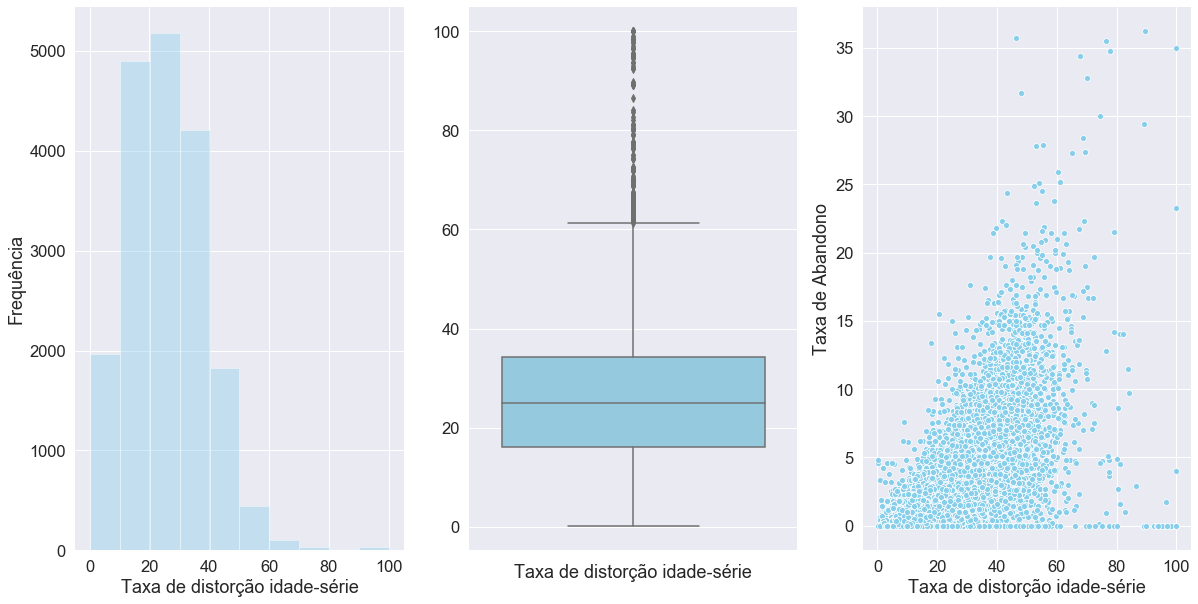

In [19]:
df_taxa_distorcao = data_frame[['ano', 'cod_ibge', 'dep_adm', 'locallizacao', 'tot_fund_tx_aban', 'TDI_FUN', 'TDI_F14', 'TDI_F58']]
df_taxa_distorcao = df_taxa_distorcao.dropna()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_taxa_distorcao['TDI_FUN'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Taxa de distorção idade-série', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_taxa_distorcao['TDI_FUN'], data = df_taxa_distorcao , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Taxa de distorção idade-série', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_taxa_distorcao['tot_fund_tx_aban'], x = df_taxa_distorcao['TDI_FUN'], data = df_taxa_distorcao, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Taxa de distorção idade-série', 
                                                 ylabel = 'Taxa de Abandono' )

### Descritiva

In [20]:
df_taxa_distorcao['TDI_FUN'].describe()

count    18707.000000
mean        25.849992
std         12.914544
min          0.200000
25%         16.100000
50%         24.900000
75%         34.200000
max        100.000000
Name: TDI_FUN, dtype: float64

### Correlação

In [21]:
scipy.stats.spearmanr(a = df_taxa_distorcao['TDI_FUN'], b = df_taxa_distorcao['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.6925658039996427, pvalue=0.0)

## Taxa de Abandono - Ensino Fundamental

[Text(0, 0.5, ' '), Text(0.5, 0, 'Taxa de abandono')]

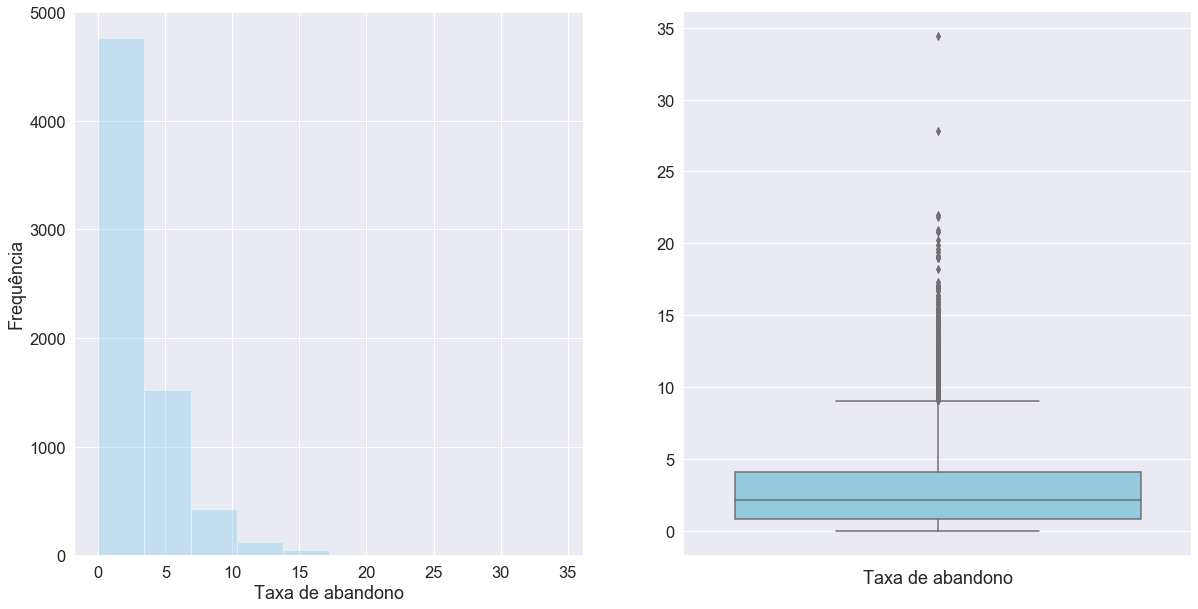

In [22]:
df_taxa_abandono = data_frame.dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_taxa_abandono['tot_fund_tx_aban'], kde = False, 
             ax = ax1, color = 'skyblue', bins=10).set(xlabel = 'Taxa de abandono', 
                                                       ylabel = 'Frequência' )
sns.boxplot(y = df_taxa_abandono['tot_fund_tx_aban'], data = df_taxa_abandono , 
            orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Taxa de abandono', ylabel = ' ' )

In [23]:
df_taxa_abandono['tot_fund_tx_aban'].describe()

count    6907.000000
mean        2.893166
std         2.941046
min         0.000000
25%         0.800000
50%         2.100000
75%         4.100000
max        34.400000
Name: tot_fund_tx_aban, dtype: float64

## ICG - Indice de complexidade da gestao

### Nível 1

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 1')]

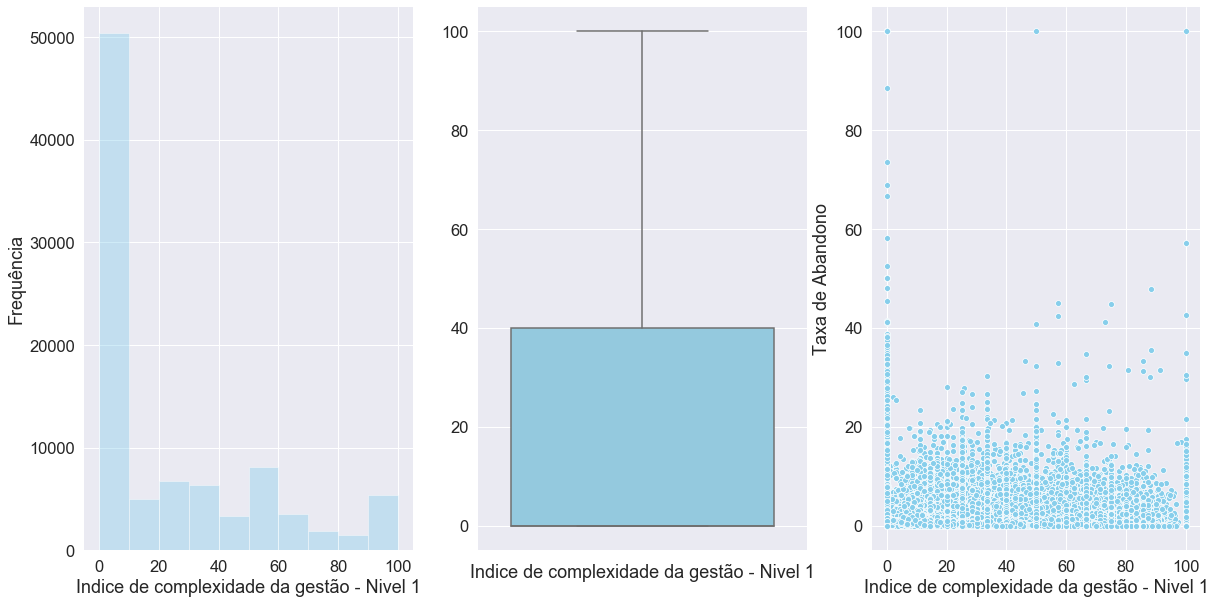

In [24]:
df_icg = data_frame[['ano', 'cod_ibge', 'dep_adm', 'locallizacao', 'tot_fund_tx_aban', 'ICG_1', 'ICG_2', 'ICG_3', 'ICG_4', 'ICG_5', 'ICG_6']]
df_icg = df_icg.dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_1'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 1', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_1'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 1', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_1'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 1', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [25]:
df_icg['ICG_1'].describe()

count    92205.000000
mean        22.215389
std         29.981954
min          0.000000
25%          0.000000
50%          0.000000
75%         40.000000
max        100.000000
Name: ICG_1, dtype: float64

#### Correlação

In [26]:
scipy.stats.spearmanr(a = df_icg['ICG_1'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.15457152164140556, pvalue=0.0)

### Nível 2

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 2')]

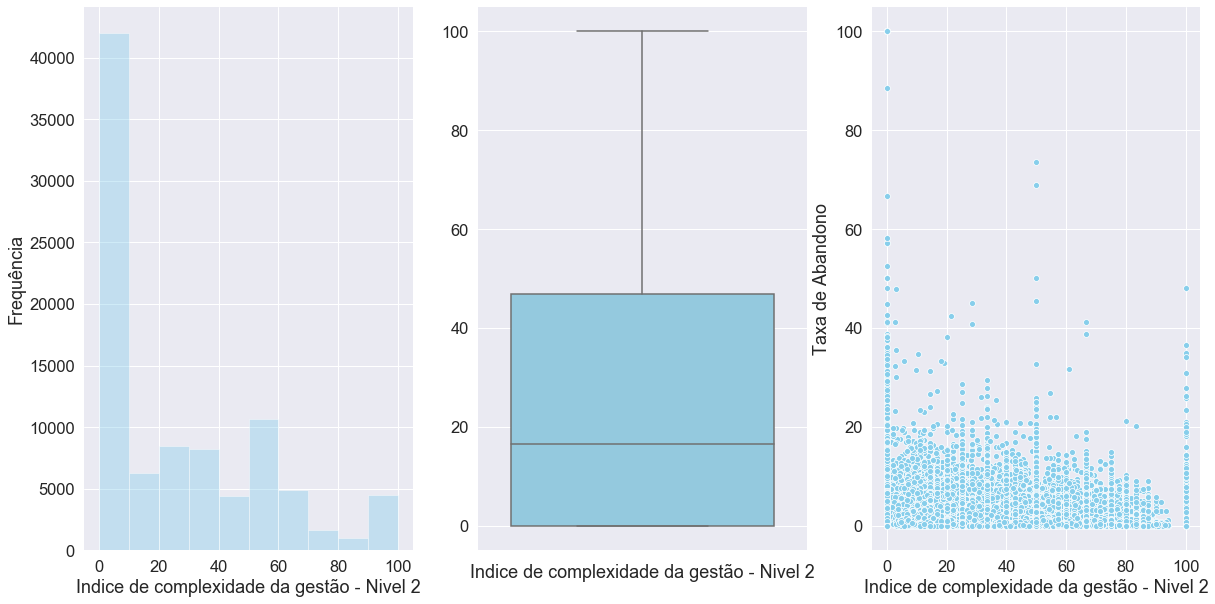

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_2'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 2', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_2'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 2', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_2'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 2', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [28]:
df_icg['ICG_2'].describe()

count    92205.000000
mean        24.882805
std         28.694870
min          0.000000
25%          0.000000
50%         16.500000
75%         46.900000
max        100.000000
Name: ICG_2, dtype: float64

#### Correlação

In [29]:
scipy.stats.spearmanr(a = df_icg['ICG_2'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.06792996886182777, pvalue=9.621907118038278e-95)

### Nível 3

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 3')]

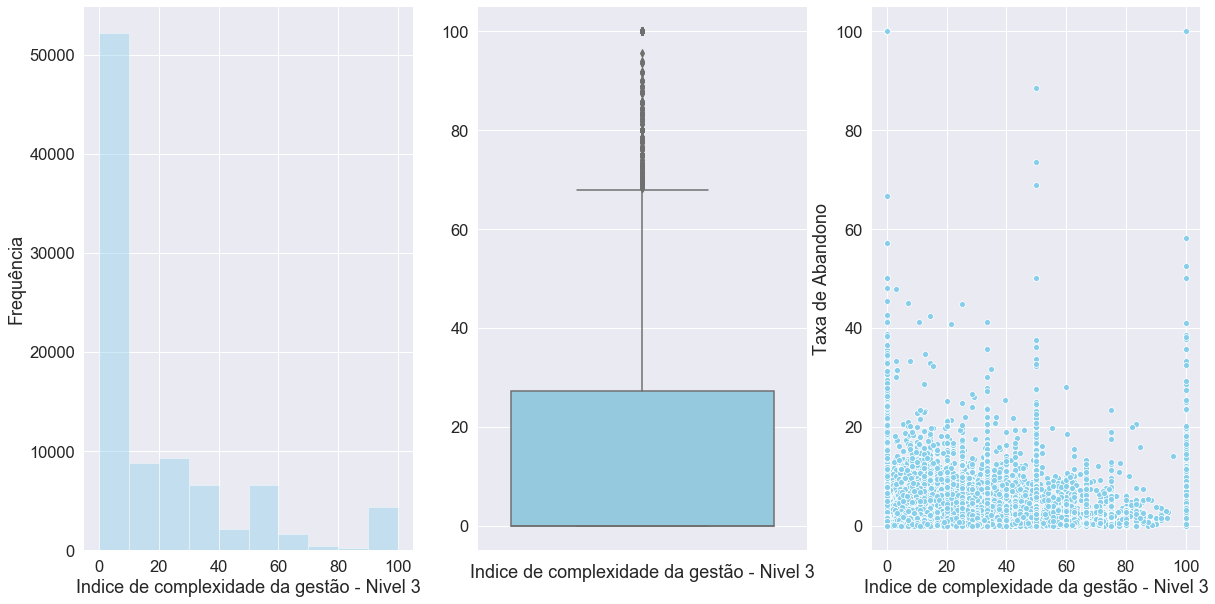

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_3'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 3', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_3'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 3', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_3'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 3', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [31]:
df_icg['ICG_3'].describe()

count    92205.000000
mean        17.420660
std         25.764599
min          0.000000
25%          0.000000
50%          0.000000
75%         27.300000
max        100.000000
Name: ICG_3, dtype: float64

#### Correlação

In [32]:
scipy.stats.spearmanr(a = df_icg['ICG_3'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.06562581636067016, pvalue=1.5384929538676843e-88)

### Nível 4

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 4')]

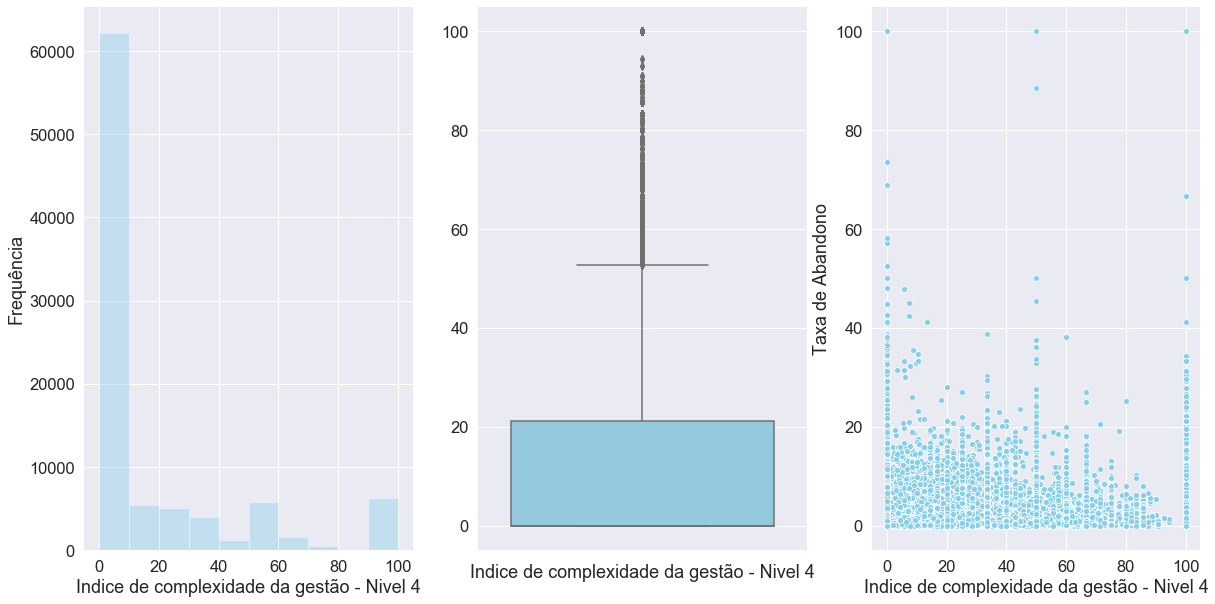

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_4'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 4', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_4'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 4', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_4'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 4', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [34]:
df_icg['ICG_4'].describe()

count    92205.000000
mean        16.102562
std         28.521095
min          0.000000
25%          0.000000
50%          0.000000
75%         21.100000
max        100.000000
Name: ICG_4, dtype: float64

#### Correlação

In [35]:
scipy.stats.spearmanr(a = df_icg['ICG_4'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.21924751452057503, pvalue=0.0)

### Nível 5

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 5')]

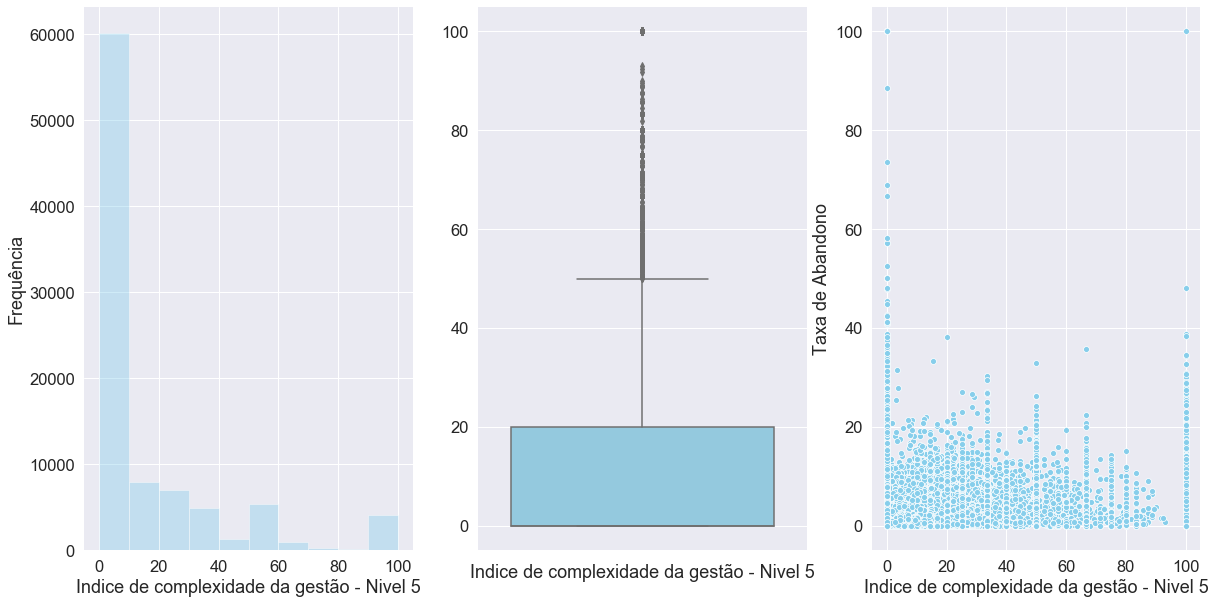

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_5'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 5', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_5'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 5', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_5'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 5', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [37]:
df_icg['ICG_5'].describe()

count    92205.000000
mean        14.102137
std         24.613290
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max        100.000000
Name: ICG_5, dtype: float64

#### Correlação

In [38]:
scipy.stats.spearmanr(a = df_icg['ICG_5'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.289109007899936, pvalue=0.0)

### Nível 6

#### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Indice de complexidade da gestão - Nivel 6')]

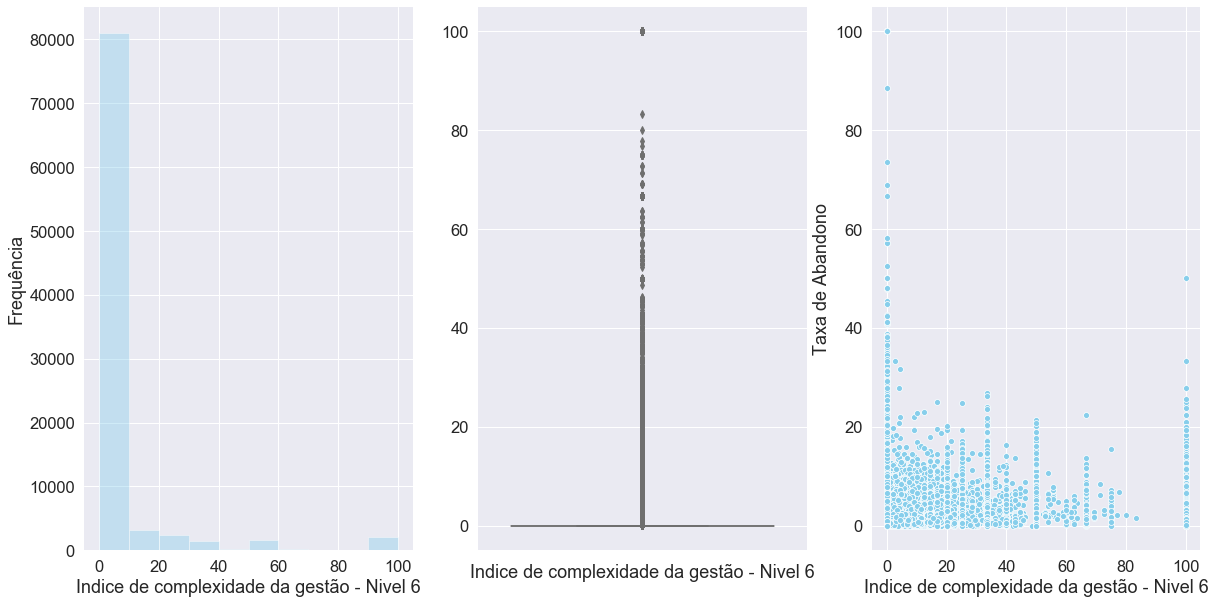

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_icg['ICG_6'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Indice de complexidade da gestão - Nivel 6', ylabel = 'Frequência' )

sns.boxplot(y = df_icg['ICG_6'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 6', ylabel = ' ' )

sns.scatterplot(y=df_icg['tot_fund_tx_aban'], x = df_icg['ICG_6'], data = df_icg, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Indice de complexidade da gestão - Nivel 6', 
                                                 ylabel = 'Taxa de Abandono' )

#### Descritiva

In [40]:
df_icg['ICG_6'].describe()

count    92205.000000
mean         5.276448
std         17.268775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: ICG_6, dtype: float64

#### Correlação

In [41]:
scipy.stats.spearmanr(a = df_icg['ICG_6'], b = df_icg['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.20137924434989257, pvalue=0.0)

## Censo

### Gráficos

#### Cor e Raça

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça não declarada')]

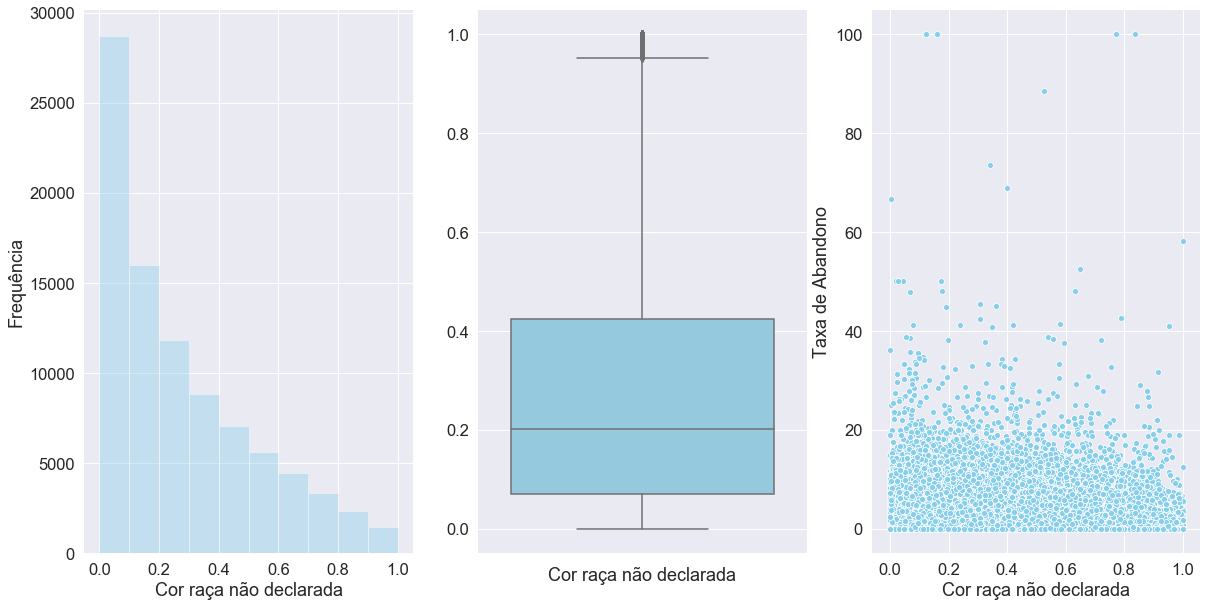

In [42]:
df_censo = data_frame[['ano', 'cod_ibge', 'dep_adm', 'locallizacao', 'tot_fund_tx_aban', 'cor_raca_nao_declarada', 'cor_raca_branca', 'cor_raca_preta','cor_raca_parda', 'cor_raca_amarela', 'cor_raca_indigena','nao_usa_transporte_publico', 'usa_transporte_publico','transporte_publico_estadual', 'transporte_publico_municipal']]
df_censo = df_censo.dropna()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_nao_declarada'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça não declarada', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_nao_declarada'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça não declarada', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_nao_declarada'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça não declarada', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça branca')]

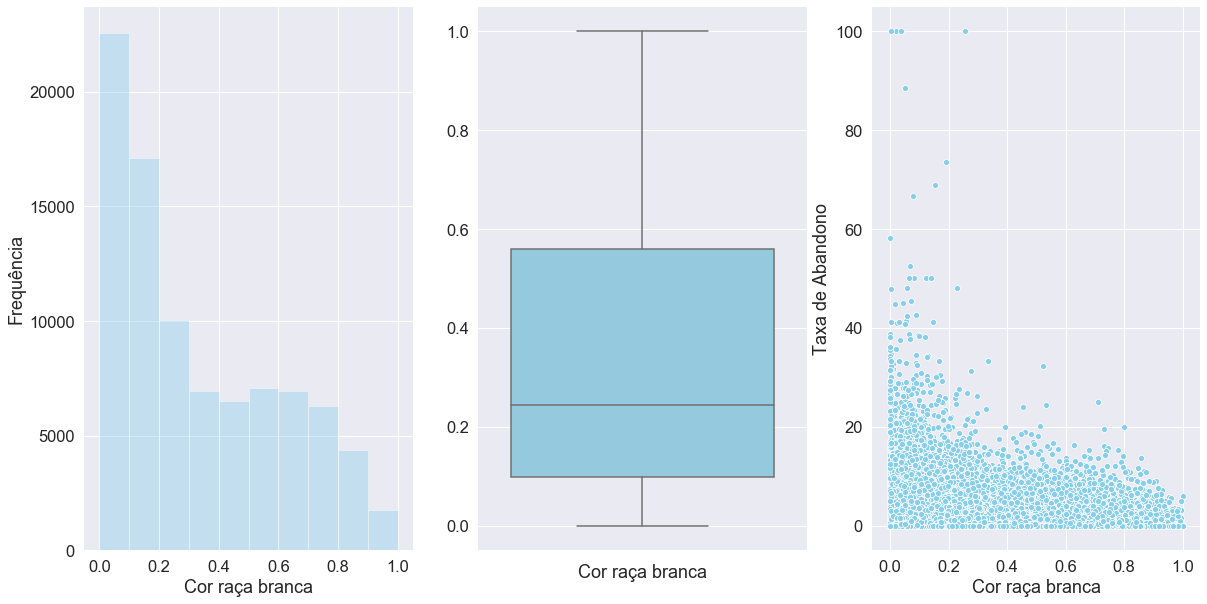

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_branca'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça branca', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_branca'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça branca', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_branca'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça branca', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça preta')]

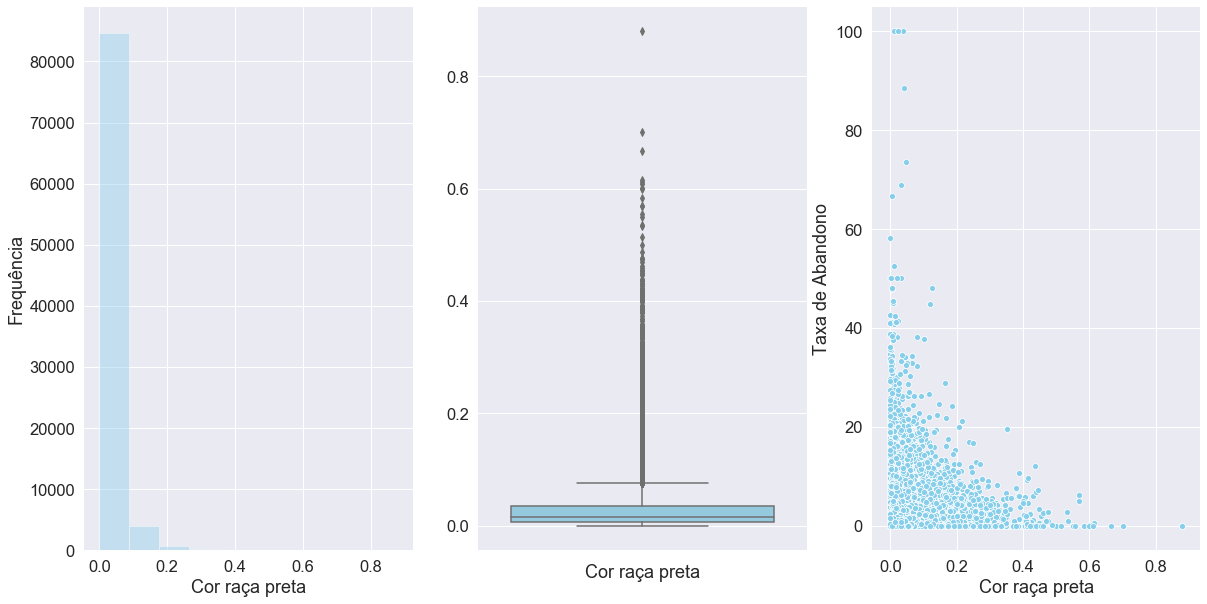

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_preta'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça preta', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_preta'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça preta', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_preta'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça preta', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça parda')]

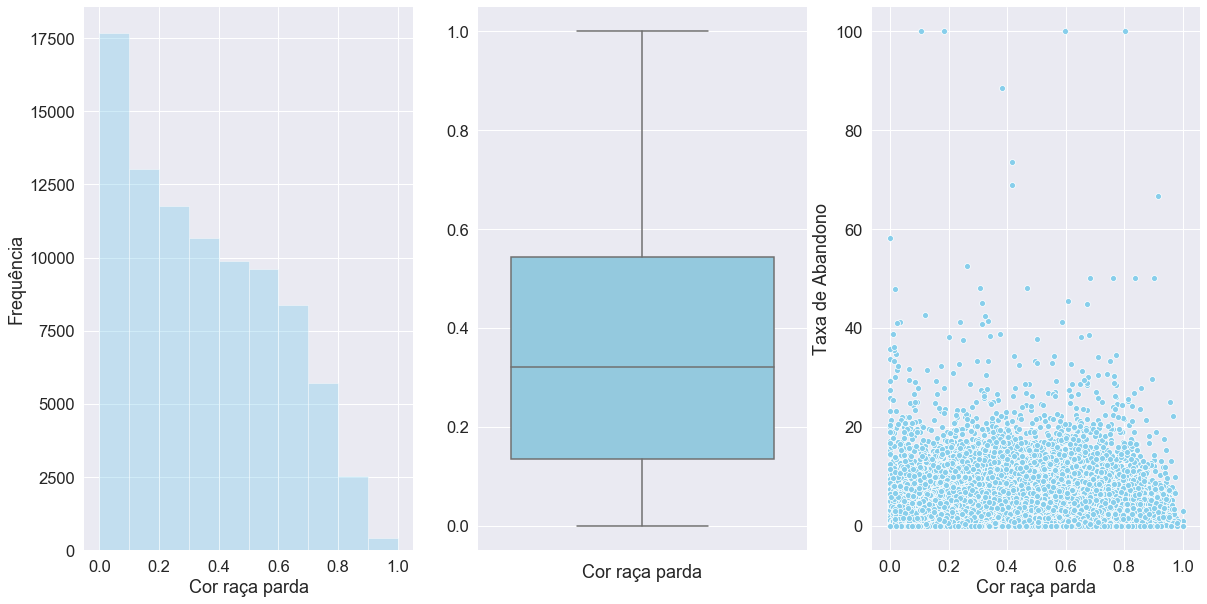

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_parda'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça parda', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_parda'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça parda', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_parda'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça parda', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça amarela')]

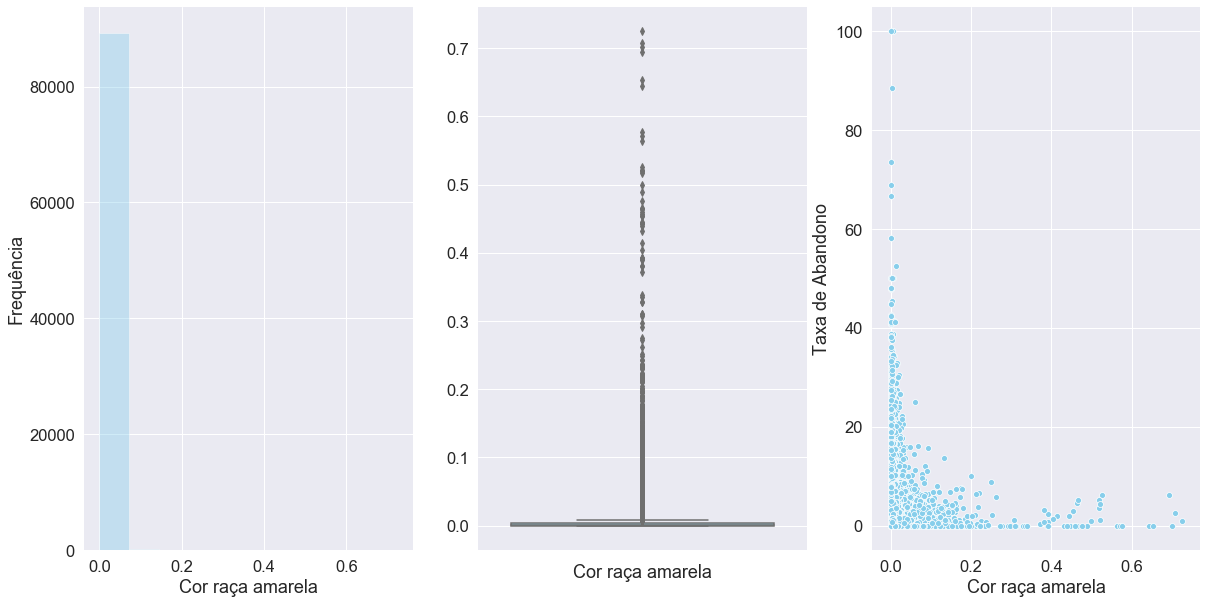

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_amarela'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça amarela', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_amarela'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça amarela', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_amarela'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça amarela', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Cor raça indigena')]

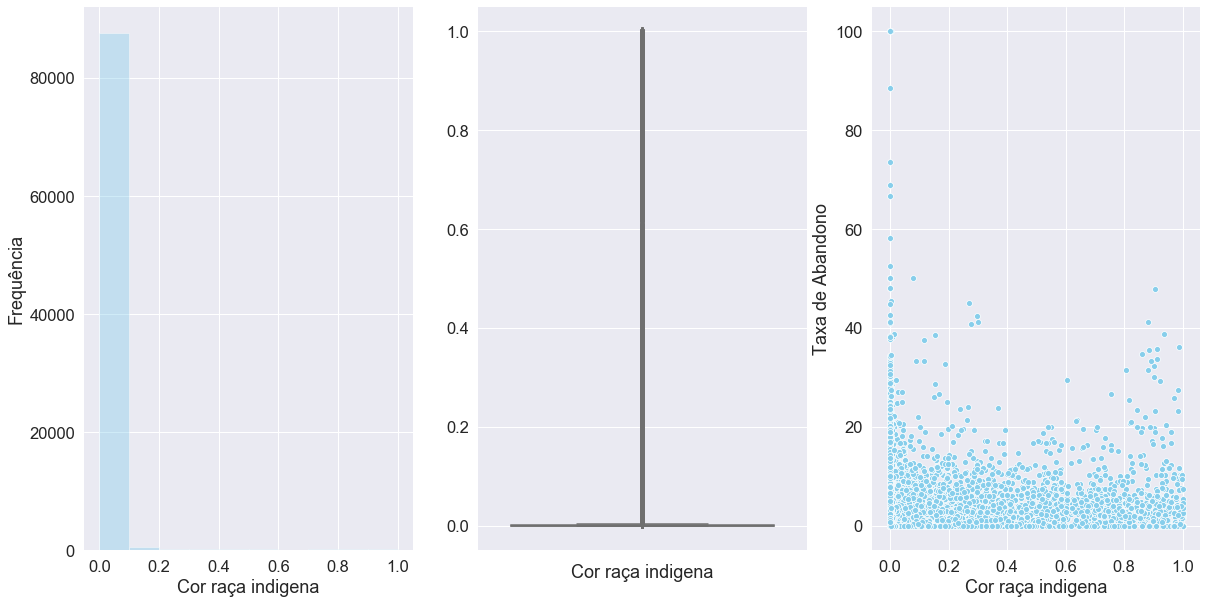

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['cor_raca_indigena'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Cor raça indigena', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['cor_raca_indigena'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Cor raça indigena', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['cor_raca_indigena'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Cor raça indigena', 
                                                 ylabel = 'Taxa de Abandono' )

#### Usa transporte escolar público

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Não usa transporte público')]

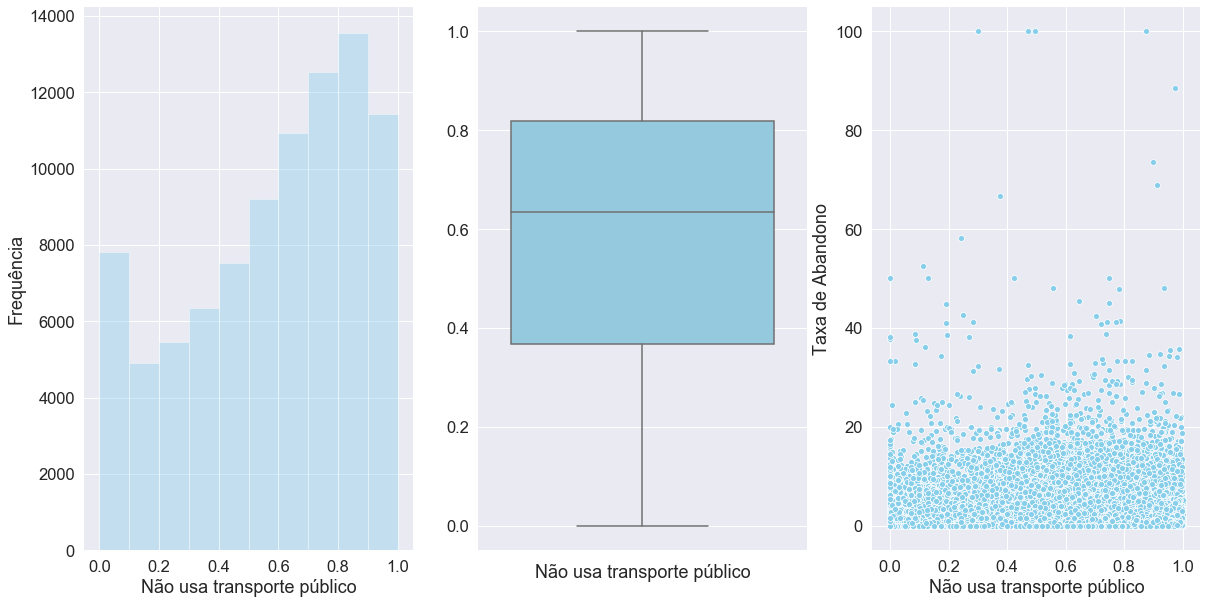

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['nao_usa_transporte_publico'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Não usa transporte público', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['nao_usa_transporte_publico'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Não usa transporte público', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['nao_usa_transporte_publico'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Não usa transporte público', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Usa transporte público')]

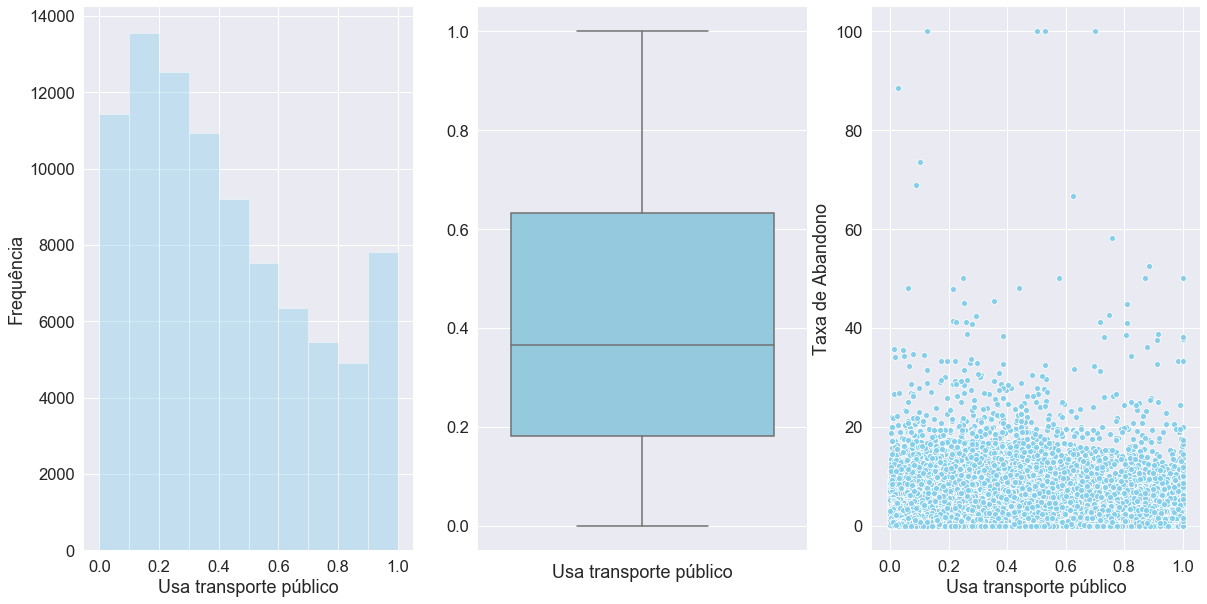

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['usa_transporte_publico'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Usa transporte público', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['usa_transporte_publico'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Usa transporte público', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['usa_transporte_publico'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Usa transporte público', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'),
 Text(0.5, 0, 'Usa transporte público estadual')]

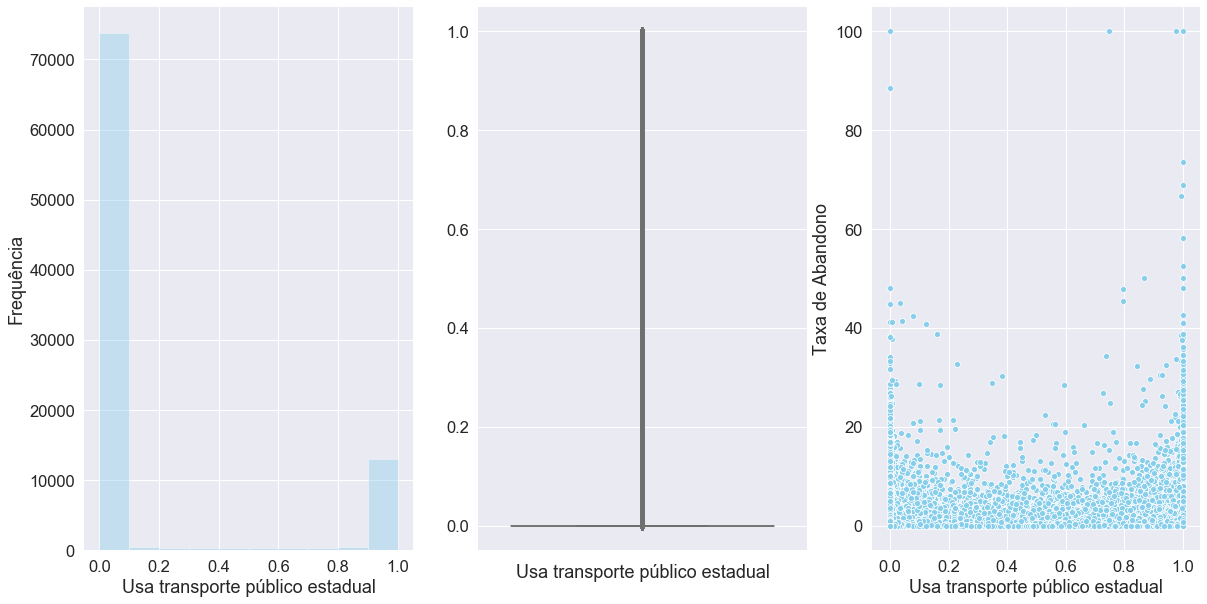

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['transporte_publico_estadual'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Usa transporte público estadual', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['transporte_publico_estadual'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Usa transporte público estadual', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['transporte_publico_estadual'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Usa transporte público estadual', 
                                                 ylabel = 'Taxa de Abandono' )

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'Usa transporte municipal')]

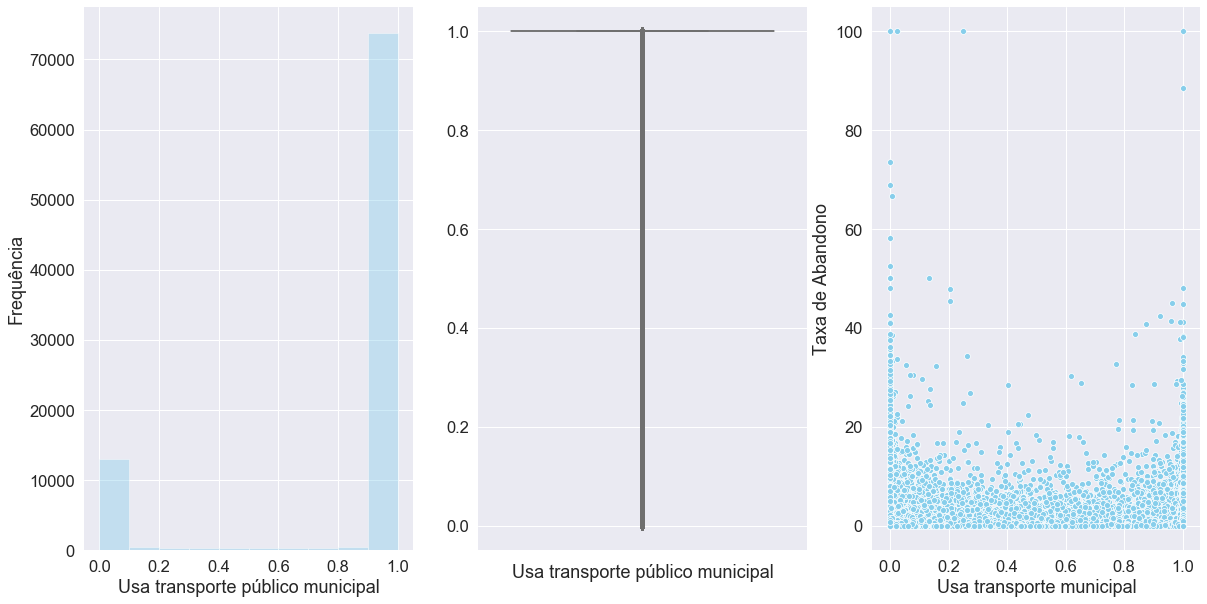

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)

sns.distplot(df_censo['transporte_publico_municipal'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'Usa transporte público municipal', 
                                               ylabel = 'Frequência' )

sns.boxplot(y = df_censo['transporte_publico_municipal'], data = df_censo , orient = 'v', 
            ax = ax2, color = 'skyblue').set(xlabel = 'Usa transporte público municipal', 
                                             ylabel = ' ' )

sns.scatterplot(y=df_censo['tot_fund_tx_aban'], x = df_censo['transporte_publico_municipal'], data = df_censo, 
                ax = ax3, color = 'skyblue').set(xlabel = 'Usa transporte municipal', 
                                                 ylabel = 'Taxa de Abandono' )

### Descritiva

#### Cor e Raça

In [52]:
df_censo['cor_raca_nao_declarada'].describe()

count    89689.000000
mean         0.274431
std          0.244670
min          0.000000
25%          0.070866
50%          0.200587
75%          0.423747
max          1.000000
Name: cor_raca_nao_declarada, dtype: float64

In [53]:
df_censo['cor_raca_branca'].describe()

count    89689.000000
mean         0.333769
std          0.270620
min          0.000000
25%          0.099196
50%          0.244019
75%          0.558699
max          1.000000
Name: cor_raca_branca, dtype: float64

In [54]:
df_censo['cor_raca_preta'].describe()

count    89689.000000
mean         0.027155
std          0.036807
min          0.000000
25%          0.006171
50%          0.015878
75%          0.034017
max          0.880000
Name: cor_raca_preta, dtype: float64

In [55]:
df_censo['cor_raca_parda'].describe()

count    89689.000000
mean         0.349021
std          0.241936
min          0.000000
25%          0.135693
50%          0.321429
75%          0.543210
max          1.000000
Name: cor_raca_parda, dtype: float64

In [56]:
df_censo['cor_raca_amarela'].describe()

count    89689.000000
mean         0.003787
std          0.014759
min          0.000000
25%          0.000000
50%          0.000920
75%          0.003464
max          0.724684
Name: cor_raca_amarela, dtype: float64

In [57]:
df_censo['cor_raca_indigena'].describe()

count    89689.000000
mean         0.011838
std          0.078851
min          0.000000
25%          0.000000
50%          0.000000
75%          0.001104
max          1.000000
Name: cor_raca_indigena, dtype: float64

#### Usa transporte público escolar

In [58]:
df_censo['usa_transporte_publico'].describe()

count    89689.000000
mean         0.421043
std          0.285152
min          0.000022
25%          0.181581
50%          0.365231
75%          0.631579
max          1.000000
Name: usa_transporte_publico, dtype: float64

In [59]:
df_censo['nao_usa_transporte_publico'].describe()

count    89689.000000
mean         0.578940
std          0.285139
min          0.000000
25%          0.368421
50%          0.634758
75%          0.818402
max          0.999978
Name: nao_usa_transporte_publico, dtype: float64

In [60]:
df_censo['transporte_publico_estadual'].describe()

count    89689.000000
mean         0.161509
std          0.357882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: transporte_publico_estadual, dtype: float64

In [61]:
df_censo['transporte_publico_municipal'].describe()

count    89689.000000
mean         0.838491
std          0.357882
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: transporte_publico_municipal, dtype: float64

### Correlação

#### Cor e Raça

In [62]:
scipy.stats.spearmanr(a = df_censo['cor_raca_nao_declarada'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.18028145334032464, pvalue=0.0)

In [63]:
scipy.stats.spearmanr(a = df_censo['cor_raca_branca'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.44020558408279004, pvalue=0.0)

In [64]:
scipy.stats.spearmanr(a = df_censo['cor_raca_preta'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.13658447250886296, pvalue=0.0)

In [65]:
scipy.stats.spearmanr(a = df_censo['cor_raca_parda'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.31707788068132914, pvalue=0.0)

In [66]:
scipy.stats.spearmanr(a = df_censo['cor_raca_amarela'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.1726494628488395, pvalue=0.0)

In [67]:
scipy.stats.spearmanr(a = df_censo['cor_raca_indigena'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.1983174307866572, pvalue=0.0)

#### Usa transporte escolar público 

In [68]:
scipy.stats.spearmanr(a = df_censo['usa_transporte_publico'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.17499613638237793, pvalue=0.0)

In [69]:
scipy.stats.spearmanr(a = df_censo['nao_usa_transporte_publico'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.1750526779911442, pvalue=0.0)

In [70]:
scipy.stats.spearmanr(a = df_censo['transporte_publico_estadual'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=0.07848780880471934, pvalue=1.5297804078310938e-122)

In [71]:
scipy.stats.spearmanr(a = df_censo['transporte_publico_municipal'], b = df_censo['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.07848780880471934, pvalue=1.5297804078310938e-122)

## IDEB

### Gráficos

In [72]:
data_frame['ideb'] = data_frame['nota_padronizada']*data_frame['tot_fund_tx_ap']/100

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'IDEB')]

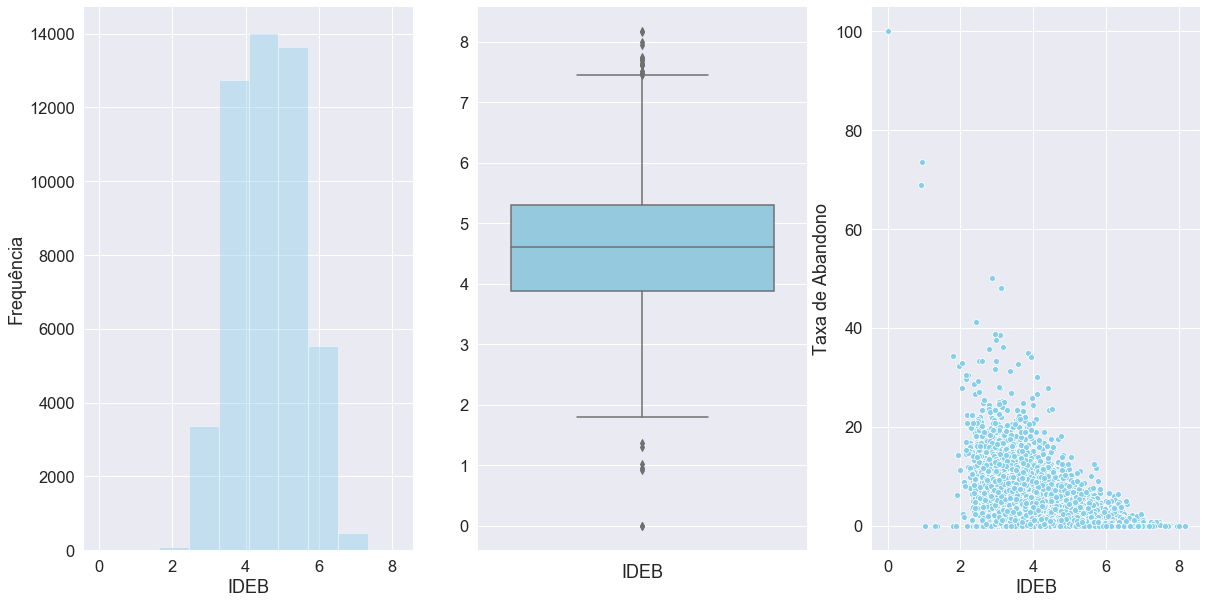

In [73]:
df_ideb = data_frame[['ano', 'cod_ibge', 'dep_adm', 'locallizacao', 'tot_fund_tx_aban', 'ideb']]
df_ideb = df_ideb.dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_ideb['ideb'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'IDEB', ylabel = 'Frequência' )

sns.boxplot(y = df_ideb['ideb'], data = df_icg , orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'IDEB', ylabel = ' ' )

sns.scatterplot(y=df_ideb['tot_fund_tx_aban'], x = df_ideb['ideb'], data = df_ideb, 
                ax = ax3, color = 'skyblue').set(xlabel = 'IDEB', 
                                                 ylabel = 'Taxa de Abandono' )

### Descritiva

In [74]:
df_ideb['ideb'].describe()

count    49893.000000
mean         4.597493
std          0.913809
min          0.000000
25%          3.876334
50%          4.599733
75%          5.303012
max          8.167134
Name: ideb, dtype: float64

### Correlação

In [75]:
scipy.stats.spearmanr(a = df_ideb['ideb'], b = df_ideb['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.6904586964286771, pvalue=0.0)

## INSE

### Gráficos

[Text(0, 0.5, 'Taxa de Abandono'), Text(0.5, 0, 'INSE')]

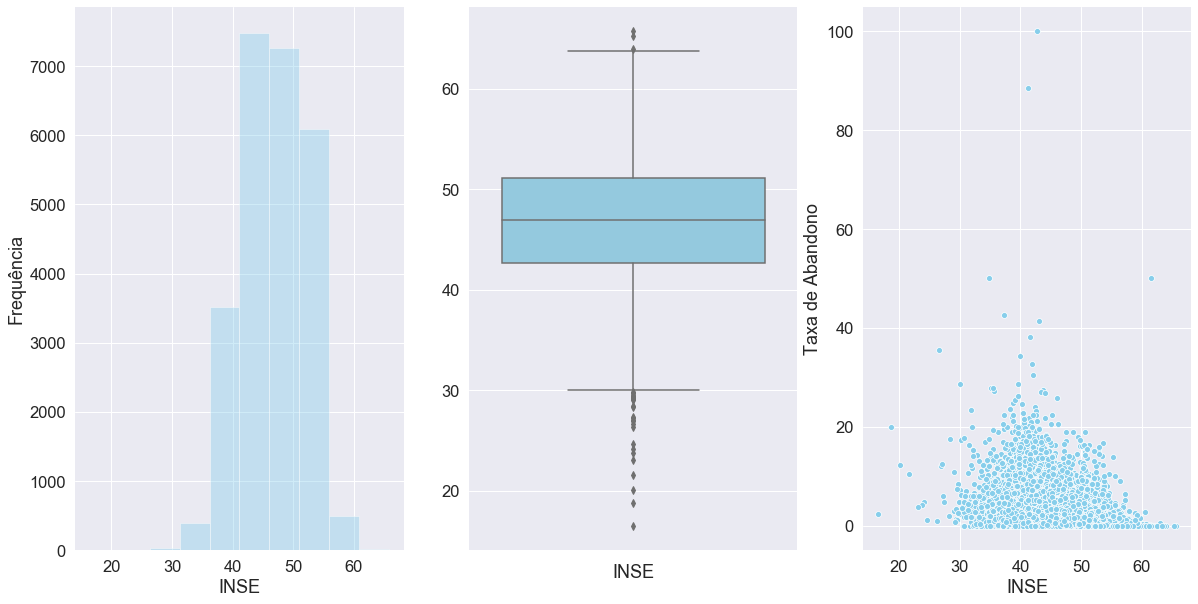

In [76]:
df_inse = data_frame[['ano', 'cod_ibge', 'dep_adm', 'locallizacao', 'tot_fund_tx_aban', 'inse']]
df_inse = df_inse.dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,10))
sns.despine(fig, left = True, bottom = True)


sns.distplot(df_inse['inse'], kde = False, ax = ax1, 
             color = 'skyblue', bins = 10).set(xlabel = 'INSE', ylabel = 'Frequência' )

sns.boxplot(y = df_inse['inse'], data = df_inse, orient = 'v', ax = ax2, color = 'skyblue').set(xlabel = 'INSE', ylabel = ' ' )

sns.scatterplot(y=df_inse['tot_fund_tx_aban'], x = df_inse['inse'], data = df_inse, 
                ax = ax3, color = 'skyblue').set(xlabel = 'INSE', 
                                                 ylabel = 'Taxa de Abandono' )

### Descritiva

In [77]:
df_inse['inse'].describe()

count    25300.000000
mean        46.803785
std          5.285198
min         16.539179
25%         42.658376
50%         46.970000
75%         51.110000
max         65.710795
Name: inse, dtype: float64

### Correlação

In [78]:
scipy.stats.spearmanr(a = df_inse['inse'], b = df_inse['tot_fund_tx_aban'])

SpearmanrResult(correlation=-0.4971435633767747, pvalue=0.0)

## Missings 

In [79]:
print('A tabela possui {} linhas como uma porcentagem de {} % de valores missings'.format(data_frame.shape[0],(data_frame.isnull().sum().sum()/(data_frame.shape[0]*data_frame.columns.shape[0]))))

A tabela possui 92205 linhas como uma porcentagem de 0.1418460920657114 % de valores missings


In [80]:
df = data_frame[['ideb', 'TDI_FUN', 'inse', 'tot_fund_tx_aban']]
imputer = KNNImputer(missing_values = np.nan, n_neighbors=30, weights='uniform')

In [81]:
df = imputer.fit_transform(df)

In [82]:
df = pd.DataFrame(data=df, columns=['ideb', 'TDI_FUN', 'inse', 'tot_fund_tx_aban'])

## Scaler dos dados

In [84]:
scaler = Normalizer()
df_scaler = df[['ideb', 'TDI_FUN','inse']]
target = df[['tot_fund_tx_aban']]
scaler = scaler.fit(df_scaler)

In [85]:
df_scaled = scaler.transform(df_scaler)


df_scaled = pd.DataFrame(data = df_scaled, columns=df_scaler.columns)
df_scaled = df_scaled.merge(target, how = 'inner', left_index=True, right_index=True)

## Treino modelo

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['ideb', 'TDI_FUN','inse']], 
                                                    df_scaled['tot_fund_tx_aban'], 
                                                    test_size=0.10, random_state=42)

In [87]:
regressor = RandomForestRegressor(n_estimators = 300, max_depth=100)
modelo = regressor.fit(X_train,y_train)

## Teste

In [88]:
pred = modelo.predict(X_test)

## Validação do modelo

In [89]:
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
mape = mean_absolute_percentage_error(y_test, pred)

In [90]:
print('O valor do MAE é de {} pontos percentuais'.format(round(mae,5)))
print('O Valor do RMSE é de {} pontos percentuais'.format(round(rmse,3)))
print('O Valor do MAPE é de {}%'.format(round(mape,2)))

O valor do MAE é de 0.71223 pontos percentuais
O Valor do RMSE é de 1.472 pontos percentuais
O Valor do MAPE é de 40.84%


[Text(0, 0.5, 'predito'), Text(0.5, 0, 'observado')]

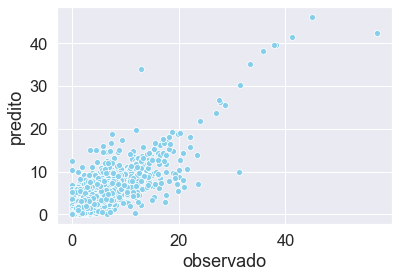

In [91]:
sns.scatterplot(y = pred, x = y_test, color = 'skyblue').set(ylabel = 'predito', xlabel = 'observado' )

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'observado')]

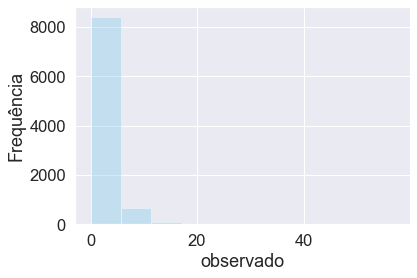

In [92]:
sns.distplot(y_test, kde = False,
             color = 'skyblue', bins = 10).set(xlabel = 'observado', 
                                               ylabel = 'Frequência' )

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'predito')]

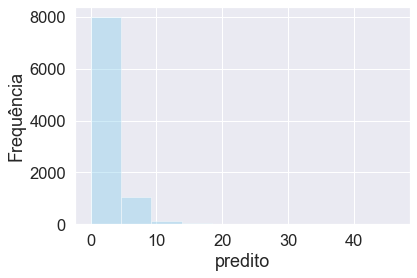

In [93]:
sns.distplot(pred, kde = False,
             color = 'skyblue', bins = 10).set(xlabel = 'predito', 
                                               ylabel = 'Frequência' )